In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

import sympy as sp

In [3]:
"""b = Bloch3d()
t= np.linspace(0,1,10)
x = np.cos(t)
y = np.sin(t)
z = np.exp(-t)
pnt = np.array([x,y,z])
b.add_points(pnt,meth="s")
#b.add_vectors(pnt)
#b.add_states(vac,kind="vector")
b.show()"""


'b = Bloch3d()\nt= np.linspace(0,1,10)\nx = np.cos(t)\ny = np.sin(t)\nz = np.exp(-t)\npnt = np.array([x,y,z])\nb.add_points(pnt,meth="s")\n#b.add_vectors(pnt)\n#b.add_states(vac,kind="vector")\nb.show()'

In [4]:
Gamma =1
Rabi = 0.0001
d_L = 0



In [5]:
def model_2_l(rho,t):
    rho_bb, rho_aa, a, b = rho[0],rho[1],rho[2],rho[3]
    dt_rho_bb = -Rabi*b - Gamma*rho_bb
    dt_rho_aa =  Rabi*b + Gamma*rho_bb
    dt_a      =  -d_L*b -(Gamma/2)*a
    dt_b      =   d_L*a -(Gamma/2)*b +(Rabi/2)*(rho_bb-rho_aa)
    return [dt_rho_bb,dt_rho_aa,dt_a,dt_b]
def rho_to_m(rho,one_el=False):
    m_x,m_y,m_z = [],[],[]
    if one_el == True:
        m_x.append(2*rho[2])
        m_y.append(-2*rho[3])
        m_z.append(2*rho[0]-1)
    else:
        for el in rho:
            m_x.append(2*el[2])
            m_y.append(-2*el[3])
            m_z.append(2*el[0]-1)
    return np.array(m_x),np.array(m_y),np.array(m_z)

In [6]:
t = np.linspace(0,20,300)
#rho_init = [1/2,1/2,1/(np.sqrt(2)*2),1/(np.sqrt(2)*2)]
rho_init = [1,0,0,0]
rho = odeint(model_2_l,rho_init,t)

m = rho_to_m(rho)
#m =rho_to_m(rho_init,True)

A = 2*d_L**2+(Gamma**2)/2
Mz= -(A)/(A+Rabi**2)
My= Gamma*(1+Mz)/Rabi
Mx= (2*d_L*My)/Gamma

In [7]:
B=Bloch3d()

In [8]:


#B=Bloch()
B.add_points([Mx,My,Mz])
#B.add_vectors([0.,1.,0.])
#B.add_points([1.,0.,0.])
#B.show()
B.add_points([m[0],m[1],m[2]],meth="s")
"""def RUNN():
    for i in range(len(m[0])):
        a = [m[0][i],m[1][i],m[2][i]]
        B.add_points(a,meth="s")
    B.show()
RUNN()"""
#B.show()

'def RUNN():\n    for i in range(len(m[0])):\n        a = [m[0][i],m[1][i],m[2][i]]\n        B.add_points(a,meth="s")\n    B.show()\nRUNN()'

In [9]:
#B.show()

In [10]:
Om = sp.Symbol("\Omega")
Ga = sp.Symbol("\Gamma")
A= sp.Symbol("A")
B = sp.Symbol("B")
a = sp.Matrix([
    [-Ga,Om],
    [-Om,-Ga/2]
])

P,D =a.diagonalize()
display(sp.simplify(P*D*(P.inv())))

display(sp.simplify(P.inv()))
display(P*sp.Matrix([[A],
                    [B]]))
display(D)

Matrix([
[-\Gamma,    \Omega],
[-\Omega, -\Gamma/2]])

Matrix([
[ 2*\Omega/sqrt(\Gamma**2 - 16*\Omega**2), -\Gamma/(2*sqrt(\Gamma**2 - 16*\Omega**2)) + 1/2],
[-2*\Omega/sqrt(\Gamma**2 - 16*\Omega**2),  \Gamma/(2*sqrt(\Gamma**2 - 16*\Omega**2)) + 1/2]])

Matrix([
[4*A*\Omega/(\Gamma - sqrt(\Gamma**2 - 16*\Omega**2)) + 4*B*\Omega/(\Gamma + sqrt(\Gamma**2 - 16*\Omega**2))],
[                                                                                                      A + B]])

Matrix([
[-3*\Gamma/4 - sqrt(\Gamma**2 - 16*\Omega**2)/4,                                              0],
[                                             0, -3*\Gamma/4 + sqrt(\Gamma**2 - 16*\Omega**2)/4]])

In [11]:
import scipy as scp
A = Gamma-scp.sqrt(Gamma**2-16*Rabi**2)
B = Gamma+scp.sqrt(Gamma**2-16*Rabi**2)
alpha = 3*Gamma/4
beta  = scp.sqrt(Gamma**2-16*Rabi**2)/4
A1 = Gamma*Rabi/(2*beta*(alpha+beta))
A2 = Gamma*Rabi/(2*beta*(beta-alpha))

M = sp.Matrix([
    [4*Rabi/A,4*Rabi/B],
    [1,1]
])
z_0 =sp.Symbol("z_0")
y_0 =sp.Symbol("y_0")

m_z_0 = 1
m_y_0 = 0
b = sp.Matrix([
    [m_z_0+4*Rabi*A1/A+4*Rabi*A2/B],
    [m_y_0+A1+A2]
])

M_z_0, M_y_0 =list(sp.linsolve((M,b),[z_0,y_0]))[0]

M_z_l = M_z_0*np.e**((-alpha-beta)*t) - A1
M_y_l = M_y_0*np.e**((-alpha+beta)*t) - A2

m_z_l = 4*Rabi*(M_z_l/A + M_y_l/B)
m_y_l = M_z_l + M_y_l

display()



In [14]:
A_s = Ga-sp.sqrt(Ga**2-16*Om**2)
B_s = Ga+sp.sqrt(Ga**2-16*Om**2)
alpha_s = 3*Ga/4
beta_s  = sp.sqrt(Ga**2-16*Om**2)/4
A1_s = Ga*Om/(2*beta_s*(alpha_s+beta_s))
B1_s = Ga*Om/(2*beta_s*(beta_s-alpha_s))
display(sp.simplify(A1_s/A_s + B1_s/B_s))
print(sp.latex(sp.simplify(A1_s + B1_s)))

\Gamma**2/(4*\Omega*(\Gamma**2 + 2*\Omega**2))

- \frac{2 \Gamma \Omega}{\Gamma^{2} + 2 \Omega^{2}}


In [51]:
#m_z_l = [sp.re(el) for el in m_z_l]
m_y_l = [sp.re(el) for el in m_y_l]

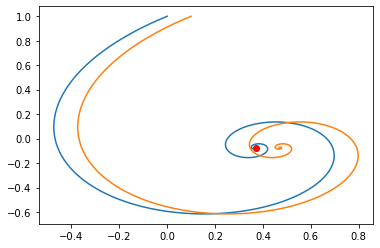

In [59]:
plt.plot(m_y_l,m_z_l)
plt.plot(My,Mz,"ro")
plt.plot(m[1]+0.1,m[2])

In [25]:
%matplotlib qt
fig, axs = plt.subplots()

G_ = np.linspace(0,5,100)
d_L_l = np.linspace(0,2,9)#[0,0.1,0.2,0.3,0.4,0.5,0.6]
for d_L_ in d_L_l:
    m_z_s = -(2*d_L_**2 + (G_**2)/2)/(2*d_L_**2 + (G_**2)/2 +1)
    axs.plot(G_, m_z_s,label=(r"$d_L' =$"+str(d_L_)))
axs.set_xlabel(r"$\Gamma'$",fontsize=50)
axs.set_ylabel(r"$m_z$",fontsize=50)
axs.set_title(r"The stationary point $m_z(t\to \infty)$",fontsize = 40)
axs.tick_params(axis='both', which='major', labelsize=20)
axs.legend(fontsize = 20)